# Big Data Group Project: Functional Map of the World

## Purpose of this notebook: To evaluate how countries prioritize Food Manufacturing/Farming and Power/Energy Industry relative to one another

In [1]:
# import the data and relevant libraries
import pandas as pd
import ast

data=pd.read_csv("../datasets/groundtruthdata.csv")

data.head()

,Unnamed: 0,img_filename,bounding_boxes,gsd,img_width,img_height,mean_pixel_height,mean_pixel_width,utm,country_code,...,off_nadir_angle_start_dbl,off_nadir_angle_end_dbl,off_nadir_angle_min_dbl,off_nadir_angle_max_dbl,catalog_id,sensor_platform_name,raw_location,spatial_reference,epsg,abs_cal_factors
0,0,fountain_148_0_rgb.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",0.483650,1040,708,0.000004,0.000004,33T,AUT,...,9.895093,13.890012,9.895093,13.890012,1030050042F99900,WORLDVIEW02,POLYGON ((12.757161911800001 47.27071854750000...,GCS_WGS_1984,4326,"[{'band': 'coastal', 'value': 0.009295654}, {'..."
1,1,fountain_32_0_rgb.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",0.340832,1471,1191,0.000003,0.000003,35S,GRC,...,19.133013,18.779739,18.779739,19.133013,1040010011474B00,WORLDVIEW03_VNIR,POLYGON ((28.022042735799999 36.27118839789999...,GCS_WGS_1984,4326,"[{'band': 'nir', 'value': 0.0117971}, {'band':..."
2,2,fountain_141_0_rgb.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",0.357868,1401,946,0.000003,0.000003,32T,FRA,...,22.291668,22.967106,22.291668,22.967106,104001002558FA00,WORLDVIEW03_VNIR,POLYGON ((7.3853898117899996 47.68179233210000...,GCS_WGS_1984,4326,"[{'band': 'nir', 'value': 0.00691888}, {'band'..."
3,3,fountain_141_1_rgb.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",0.467651,944,638,0.000005,0.000005,32T,FRA,...,26.137505,18.055662,18.055662,26.137505,10504100014DB300,GEOEYE01,POLYGON ((7.3853898117899996 47.68179233210000...,GCS_WGS_1984,4326,"[{'band': 'blue', 'value': 0.0150102}, {'band'..."
4,4,fountain_146_0_rgb.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",0.415978,1197,760,0.000004,0.000004,32U,DEU,...,32.365765,30.903786,30.903786,32.365765,104001000D357C00,WORLDVIEW03_VNIR,POLYGON ((11.336183611799999 50.71727646499999...,GCS_WGS_1984,4326,"[{'band': 'nir', 'value': 0.0117971}, {'band':..."


In [2]:
# extract relevant information from the dataframe
categorical_items = []
for img in data[['bounding_boxes']].values:
    correct_list = ast.literal_eval(img[0])
    categorical_items.append(correct_list[0]['raw_category'])

# Add New Row
data['category'] = pd.Series(categorical_items)

In [3]:
category_df = data[['country_code', 'category']].copy()

In [4]:
food_prod = ["Crop Field Orchard","Crop Field Rice","Crop Field Corn","Crop_Field_General","Crop Field Barley",
             "Crop Field Wheat","Crop Field Vineyard","Crop Field Coffee","Crop Field Flowers",
             "Crop Field Tea","Aquaculture"]

energy_prod=["Nuclear Powerplant","Wind Farm","Factory/Powerplant","Solar Farm"]

food_df=category_df[category_df['category'].isin(food_prod)]
energy_df=category_df[category_df['category'].isin(energy_prod)]


In [5]:
food_df.head()

,country_code,category
19976,CHL,Aquaculture
19977,CHL,Aquaculture
19978,CHL,Aquaculture
19979,TWN,Aquaculture
19980,TWN,Aquaculture


In [6]:
energy_df.head()

,country_code,category
3938,DEU,Nuclear Powerplant
3939,DEU,Nuclear Powerplant
3940,DEU,Nuclear Powerplant
3941,RUS,Nuclear Powerplant
3942,RUS,Nuclear Powerplant


In [7]:
#get frequency of each category by country
food_count=pd.DataFrame(food_df['country_code'].value_counts())
energy_count=pd.DataFrame(energy_df['country_code'].value_counts())

In [8]:
food_count.head()

,country_code
FRA,10294
ITA,10084
PHL,2239
USA,1731
SVN,827


In [9]:
energy_count.head()

,country_code
CHN,3188
USA,2931
ITA,2203
IND,1764
DEU,1470


In [10]:
food_count.reset_index(inplace=True)
food_count=food_count.rename(columns={'country_code':'Food Production Frequency','index':'country_code'})

In [11]:
energy_count.reset_index(inplace=True)
energy_count=energy_count.rename(columns={'country_code':'Energy Production Frequency','index':'country_code'})

In [12]:
food_count.head()

,country_code,Food Production Frequency
0,FRA,10294
1,ITA,10084
2,PHL,2239
3,USA,1731
4,SVN,827


In [13]:
energy_count.head()

,country_code,Energy Production Frequency
0,CHN,3188
1,USA,2931
2,ITA,2203
3,IND,1764
4,DEU,1470


In [14]:
total_df=food_count.merge(energy_count, on='country_code',how='inner')
total_df.head()

,country_code,Food Production Frequency,Energy Production Frequency
0,FRA,10294,1037
1,ITA,10084,2203
2,PHL,2239,22
3,USA,1731,2931
4,SVN,827,40


## Analysis of Data

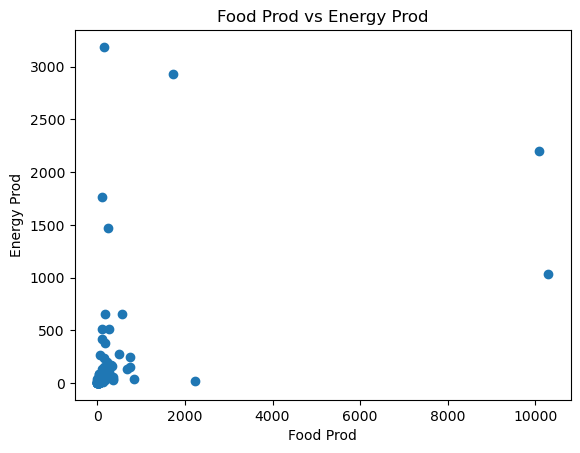

In [15]:
import matplotlib.pyplot as plt

plt.scatter(total_df["Food Production Frequency"],total_df["Energy Production Frequency"])
plt.title("Food Prod vs Energy Prod")
plt.xlabel("Food Prod")
plt.ylabel("Energy Prod")
plt.show()

In [16]:
print("Correlation between Food and Energy Production in countries is :",
      total_df["Food Production Frequency"].corr(total_df["Energy Production Frequency"]))

Correlation between Food and Energy Production in countries is : 0.4451882172701762
